In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import re

In [2]:
df = pd.read_excel(r'C:\Users\pawvaibh\Downloads\product classification.xlsx')
df1=df.copy()

In [3]:
df.head()

,CustomerId,CustomerName,ProductId,ProductName,SterilizationMethodId,SterilizationMethodName,MachineTypeId,MachineTypeName,ItemTypeId,ItemTypeName,SpecialtyId,SpecialtyName,CategoryName
0,3878,GLEN COVE HOSPITAL,10261,GLE-ENDODONTIC SETUP,26,Pre-Vac 270F 4min 30min Dry,2,Washer,4,Tray,31,Dental,Flexible Scope
1,3878,GLEN COVE HOSPITAL,10261,GLE-ENDODONTIC SETUP,26,Pre-Vac 270F 4min 30min Dry,2,Washer,4,Tray,31,Dental,Flexible Scope
2,3878,GLEN COVE HOSPITAL,10261,GLE-ENDODONTIC SETUP,26,Pre-Vac 270F 4min 30min Dry,2,Washer,4,Tray,31,Dental,Flexible Scope
3,3878,GLEN COVE HOSPITAL,10261,GLE-ENDODONTIC SETUP,26,Pre-Vac 270F 4min 30min Dry,2,Washer,4,Tray,31,Dental,Flexible Scope
4,3878,GLEN COVE HOSPITAL,10261,GLE-ENDODONTIC SETUP,26,Pre-Vac 270F 4min 30min Dry,2,Washer,4,Tray,31,Dental,Flexible Scope


In [4]:
df.columns

Index(['CustomerId', 'CustomerName', 'ProductId', 'ProductName',
       'SterilizationMethodId', 'SterilizationMethodName', 'MachineTypeId',
       'MachineTypeName', 'ItemTypeId', 'ItemTypeName', 'SpecialtyId',
       'SpecialtyName', 'CategoryName'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116057 entries, 0 to 116056
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerId               116057 non-null  int64 
 1   CustomerName             116057 non-null  object
 2   ProductId                116057 non-null  int64 
 3   ProductName              116057 non-null  object
 4   SterilizationMethodId    116057 non-null  int64 
 5   SterilizationMethodName  116057 non-null  object
 6   MachineTypeId            116057 non-null  int64 
 7   MachineTypeName          116057 non-null  object
 8   ItemTypeId               116057 non-null  int64 
 9   ItemTypeName             116057 non-null  object
 10  SpecialtyId              116057 non-null  int64 
 11  SpecialtyName            110556 non-null  object
 12  CategoryName             116057 non-null  object
dtypes: int64(6), object(7)
memory usage: 11.5+ MB


In [6]:
duplicate_count = df.duplicated().sum()
duplicate_count

108280

In [7]:
df['ProductName'].nunique()

7742

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df['ProductId'].nunique())
print(df['ProductName'].nunique())

7777
7742


In [10]:
# Group by product name and count unique IDs within each group
product_id_count_per_name = df.groupby('ProductName')['ProductId'].nunique()

# Filter out cases where there is more than one ID per name
multiple_ids_per_name = product_id_count_per_name[product_id_count_per_name > 1]

print("Product names with multiple IDs and their counts:")
for product_name, count in multiple_ids_per_name.items():
    print(f"Product Name: {product_name}, Count: {count}")


Product names with multiple IDs and their counts:
Product Name: ARCH BAR REMOVAL TRAY, Count: 2
Product Name: BONE TAMPS TRAY, Count: 2
Product Name: BREAST TRAY, Count: 2
Product Name: C-SECTION TRAY, Count: 2
Product Name: CHOR CENTRAL LINE TRAY, Count: 2
Product Name: D & C TRAY, Count: 2
Product Name: DENTAL TRAY, Count: 2
Product Name: GLE-ALLIGATOR FORCEPS (X10), Count: 2
Product Name: GLE-MINOR TRAY, Count: 2
Product Name: GLE-MYRINGOTOMY TRAY, Count: 3
Product Name: GLE-NASAL SUCTION SIZE 8 (X10), Count: 2
Product Name: GLE-SOUND SET 10-34, Count: 2
Product Name: GLE-SUTURE REMOVAL KIT, Count: 2
Product Name: GLE-VASECTOMY SET, Count: 3
Product Name: GLE-VASECTOMY TRAY, Count: 2
Product Name: GYN EXTRA LONG INSTRUMENT TRAY, Count: 2
Product Name: GYN LEEP TRAY, Count: 2
Product Name: HEMORRHOID TRAY, Count: 2
Product Name: INTESTINAL TRAY, Count: 2
Product Name: LIJ-LASER OPERATIVE SCOPE, Count: 2
Product Name: MEE-BK RECTAL PROBE, Count: 2
Product Name: MINOR TRAY, Count: 2
Pr

In [11]:
df.drop(columns=['CustomerId','CustomerName', 'ProductId', 'SterilizationMethodId', 'MachineTypeId', 'ItemTypeId','SpecialtyId'], inplace=True)

In [12]:
# Count the number of products under each category
product_count_per_category = df['CategoryName'].value_counts()

print(product_count_per_category)


CategoryName
Instrument        5501
Power System       943
Rigid Scope        845
Flexible Scope     274
Video              103
Ultrasound          74
Ophthalmic          24
Endocam             13
Name: count, dtype: int64


In [13]:
df.head()

,ProductName,SterilizationMethodName,MachineTypeName,ItemTypeName,SpecialtyName,CategoryName
0,GLE-ENDODONTIC SETUP,Pre-Vac 270F 4min 30min Dry,Washer,Tray,Dental,Flexible Scope
13,GLE-HYGIENE SETUP,Undefined,Washer,Tray,Dental,Rigid Scope
18,GLE-PROSTHODONTIC SETUP,Undefined,Washer,Tray,Dental,Power System
27,GLE-BASIC SETUP,Pre-Vac 270F 4min 30min Dry,Washer,Tray,Dental,Instrument
31,GLE-RESTORATIVE / AMALGAM SETUP,Pre-Vac 270F 4min 30min Dry,Washer,Tray,Dental,Rigid Scope


In [14]:


# Split data into features and target variable
X = df[['ProductName']]
y = df[['CategoryName']]


# Define your own set of stop words
stop_words = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

def txt_preprocessing(total_text):
    if isinstance(total_text, int):
        return ""

    # Replace every special character with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
    
    # Replace multiple spaces with single space
    total_text = re.sub('\s+',' ', total_text)
    
    # Convert all characters into lower case
    total_text = total_text.lower()
    
    # Remove stop words
    filtered_words = [word for word in total_text.split() if word not in stop_words]
    
    return ' '.join(filtered_words)

# Assuming df is your DataFrame with 'ProductName' column
for index, row in X.iterrows():
    if type(row['ProductName']) is str:
        X.at[index, 'ProcessedProductName'] = txt_preprocessing(row['ProductName'])
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

# Display the DataFrame with processed product names
print(X)



C:\Users\pawvaibh\AppData\Local\Temp\ipykernel_10724\1478220371.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.at[index, 'ProcessedProductName'] = txt_preprocessing(row['ProductName'])


                                  ProductName  \
0                        GLE-ENDODONTIC SETUP   
13                          GLE-HYGIENE SETUP   
18                    GLE-PROSTHODONTIC SETUP   
27                            GLE-BASIC SETUP   
31            GLE-RESTORATIVE / AMALGAM SETUP   
...                                       ...   
115985         NSA-ARTHREX MENISCAL ROOT TRAY   
116001                        NSA-ELLIK 4 PCS   
116005                        NSA-MAJOR ORTHO   
116052         NSA-HERAEUS PALAMIX CEMENT GUN   
116053  NSA-WOLF KLEPPINGER WITH BIPOLAR CORD   

                    ProcessedProductName  
0                   gle endodontic setup  
13                     gle hygiene setup  
18               gle prosthodontic setup  
27                       gle basic setup  
31         gle restorative amalgam setup  
...                                  ...  
115985    nsa arthrex meniscal root tray  
116001                   nsa ellik 4 pcs  
116005                  

In [15]:
X.drop(columns=['ProductName'], inplace=True)

C:\Users\pawvaibh\AppData\Local\Temp\ipykernel_10724\3100801382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['ProductName'], inplace=True)


In [16]:
X_train=X['ProcessedProductName']
y_train=y['CategoryName']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30,  random_state=42)

In [78]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 4354
NUMBER OF DATA POINTS IN TEST DATA : 1867


In [19]:
X_test

21440                    lhh neuro chromaline curettes
41070                 karl storz flexible bronchoscope
52080                                 nsp hudson brace
71663                      lij microdisectomy curettes
44902                 anterior hip retractor left tray
                              ...                     
12334                            chor ortho basic tray
21904                                  lhh acutrak set
108804          ssh harmonic scapel sterilization tray
82577                               lij scoliosis tray
87814     lij robotic mastectomy 30 degree scope trial
Name: ProcessedProductName, Length: 1556, dtype: object

In [80]:
#building a CountVectorizer with all the words that occured minimum 3 times in train data
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3, max_df=1.0)
train_text_ohe = text_vectorizer.fit_transform(X_train)

#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names_out()


#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))
print(train_text_features)

Total Number of Unique Words in Train Data : 973
['0deg' '0mm' '10' '100' '10fr' '10mm' '11' '12' '14' '15' '1688' '17'
 '23' '23g' '24fr' '25' '26fr' '30' '30deg' '32mm' '36mm' '3mm' '45' '4k'
 '4mm' '5fr' '5mm' '70' '77th' '7mm' '800' '8fr' '8mm' '90' '9mm' 'abd'
 'abdominal' 'access' 'accessories' 'accessory' 'acdf' 'ace' 'acetabular'
 'acl' 'acmi' 'acufex' 'adair' 'adams' 'adaptor' 'adult' 'advance'
 'advanced' 'aesculap' 'aim' 'air' 'airway' 'aloka' 'amputation' 'anchor'
 'aneurysm' 'ang' 'angio' 'angle' 'angled' 'ankeney' 'ankle' 'anoscopes'
 'anspach' 'anterior' 'ao' 'aortic' 'applicator' 'appliers' 'arch' 'arm'
 'arthrex' 'arthro' 'arthroscope' 'arthroscopic' 'arthroscopy' 'assi'
 'assorted' 'aston' 'atrial' 'attachment' 'auvard' 'av' 'awl' 'awls'
 'baby' 'baha' 'balfour' 'bar' 'bariatric' 'base' 'basic' 'basin' 'basket'
 'battery' 'bayonet' 'bcs' 'beckman' 'bell' 'bender' 'bill' 'bio' 'biomet'
 'biopsy' 'biotenodesis' 'bipolar' 'bipolars' 'bit' 'bixcut' 'bk' 'black'
 'blade' '

In [92]:
from sklearn.preprocessing import normalize #normalize every feature

train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
test_text_ohe = text_vectorizer.transform(X_test)

#don't forget to normalize every feature
test_text_ohe = normalize(test_text_ohe, axis=0)


In [96]:
# print("Shape of Matrix After One Hot Encoding")
print(train_text_ohe.shape)
print("-"*20)
print(test_text_ohe.shape)

(4354, 973)
--------------------
(1867, 973)


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
text_vec = TfidfVectorizer(min_df=10, max_features=5000)

# Fitting and transforming training data
train_text = text_vec.fit_transform(X_train.values)

# Transforming testing data
test_text = text_vec.transform(X_test.values)

# Printing shapes
print("Shape of Matrix - TFIDF")
print(train_text.shape)
print(test_text.shape)


Shape of Matrix - TFIDF
(4354, 297)
(1867, 297)


In [84]:
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) # Confusion matrix
    A =(((C.T)/(C.sum(axis=1))).T) # Recall matrix
    B =(C/C.sum(axis=0)) # Precision matrix
    
    labels = sorted(set(test_y))
    
    # Confusion Matrix
    print("-" * 40, "Confusion Matrix", "-" * 40)
    plt.figure(figsize=(20, 8))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # Precision Matrix
    print("-" * 40, "Precision Matrix (Column Sum=1)", "-" * 40)
    plt.figure(figsize=(20, 8))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # Recall Matrix
    print("-" * 40, "Recall Matrix (Row Sum=1)", "-" * 40)
    plt.figure(figsize=(20, 8))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 1e-05 The Log Loss is: 0.5204525026003286


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 0.0001 The Log Loss is: 0.5373072799833728


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 0.001 The Log Loss is: 0.5431703209409101


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 0.01 The Log Loss is: 0.5563161596614483


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 0.1 The Log Loss is: 0.7413872106614724


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Alpha = 1 The Log Loss is: 0.7964611430839693


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


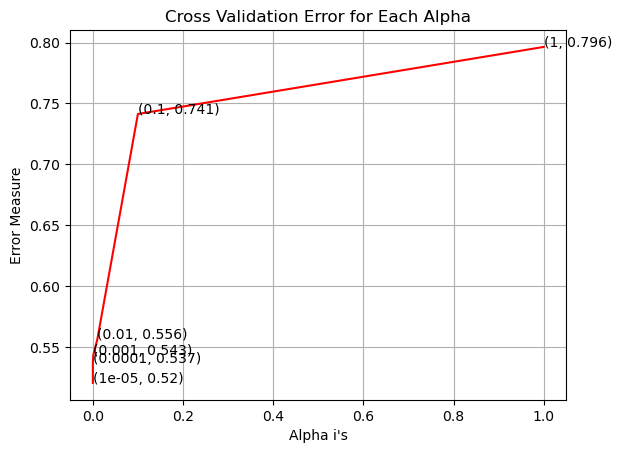

C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` wh

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.2865010168545846
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.5204525026003286


In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

#train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_ohe, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_ohe, y_train)
    
    predict_y = sig_clf.predict_proba(test_text_ohe)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_ohe, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text_ohe, y_train)

predict_y = lr_sig_clf.predict_proba(train_text_ohe)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(test_text_ohe)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [38]:
from sklearn.metrics import confusion_matrix

lr_train_accuracy = (lr_sig_clf.score(train_text_ohe, y_train)*100)
lr_cv_accuracy = (lr_sig_clf.score(test_text_ohe, y_test)*100)

print("Logistic Regression Train Accuracy -",lr_train_accuracy)
print("Logistic Regression CV Accuracy -",lr_cv_accuracy)

Logistic Regression Train Accuracy - 90.90178427905481
Logistic Regression CV Accuracy - 84.70437017994858


---------------------------------------- Confusion Matrix ----------------------------------------


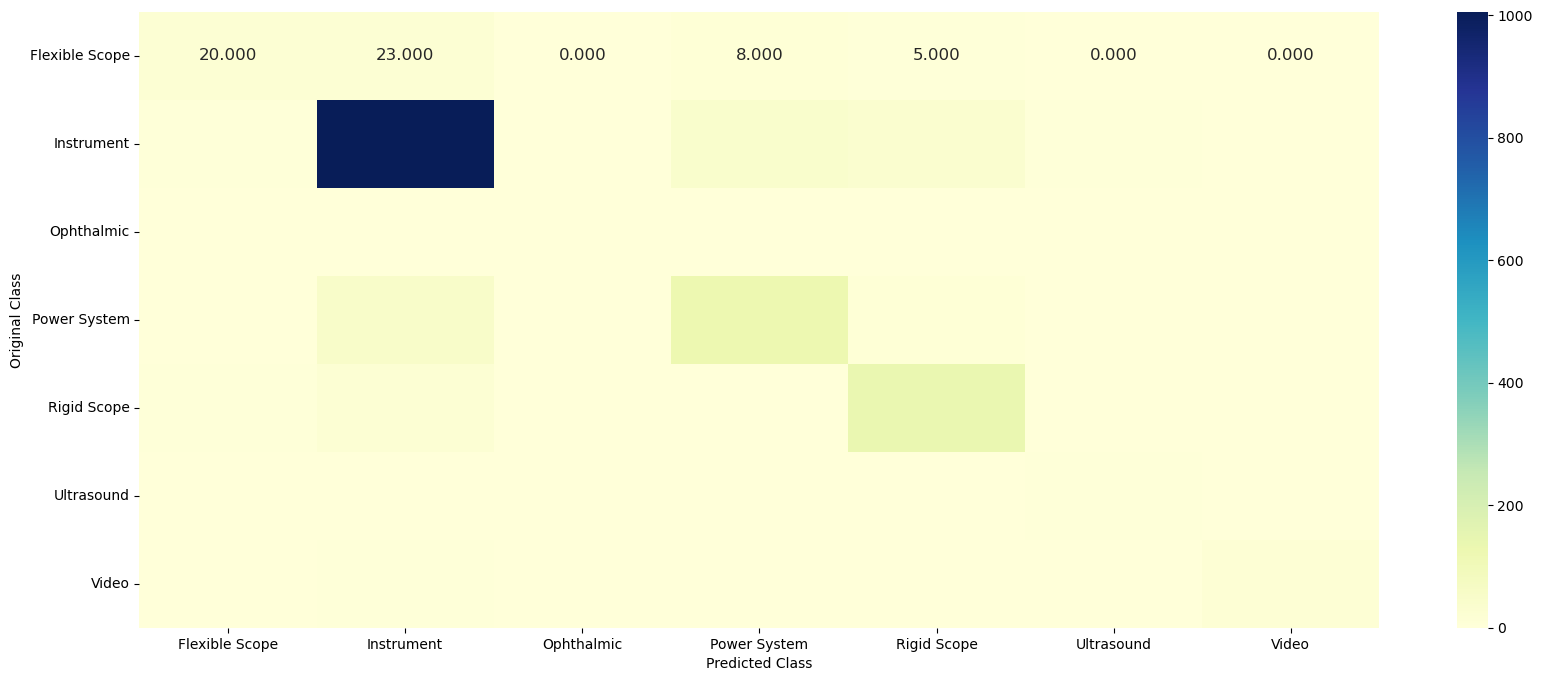

---------------------------------------- Precision Matrix (Column Sum=1) ----------------------------------------


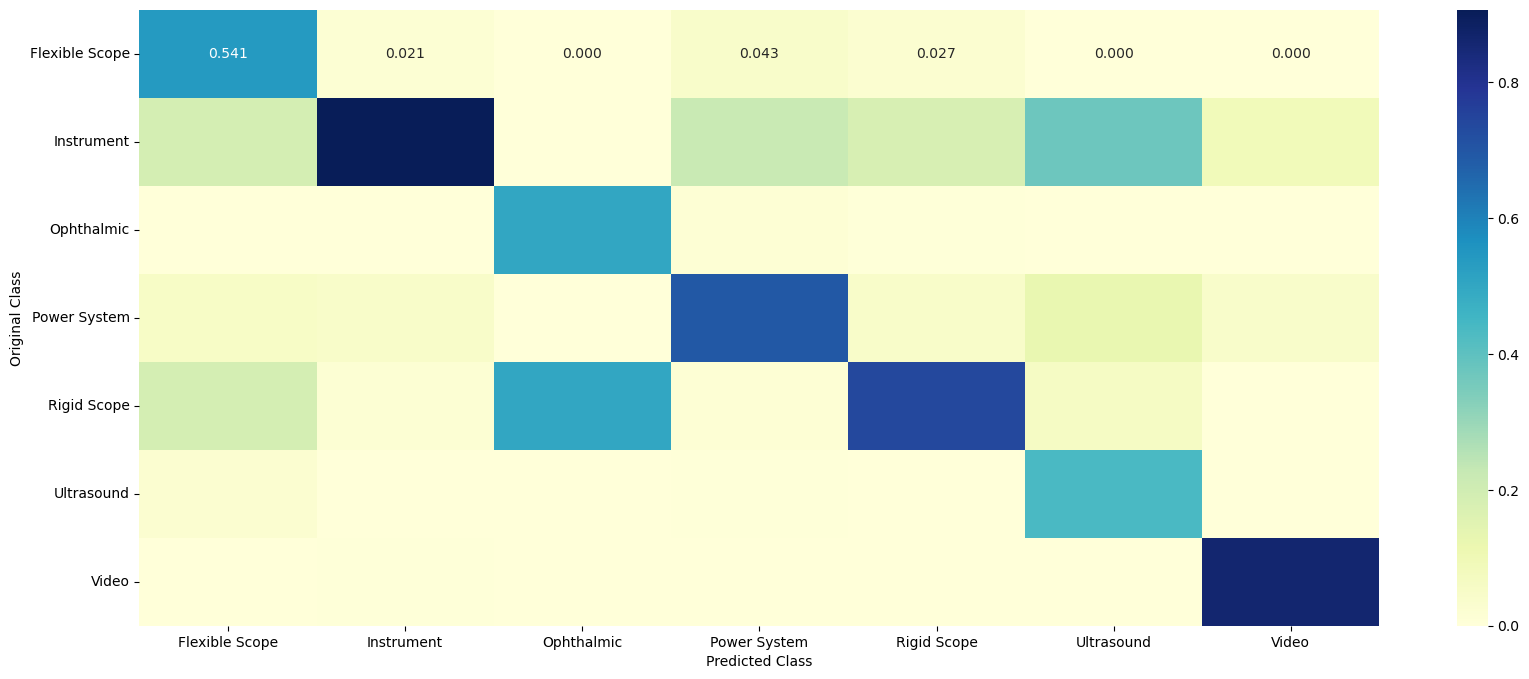

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


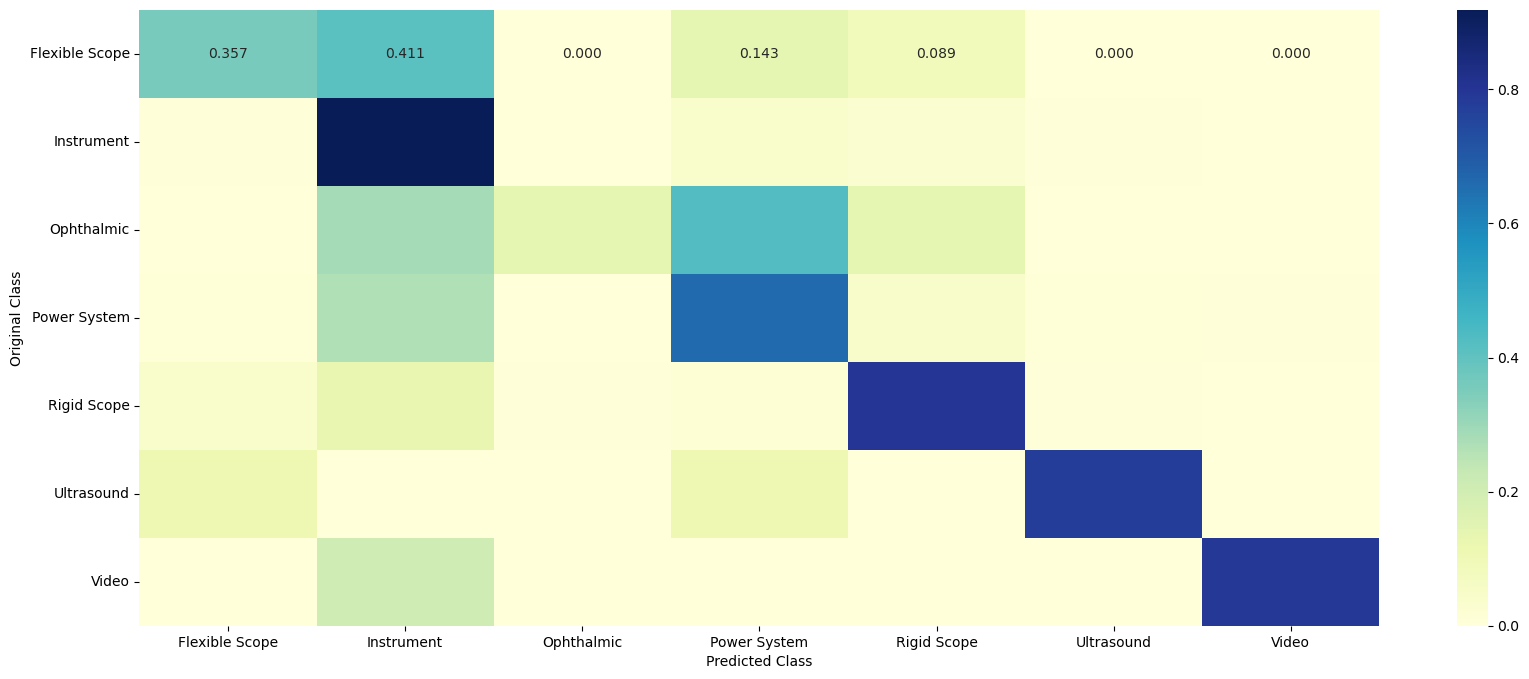

In [60]:
plot_confusion_matrix(y_test, lr_sig_clf.predict(test_text_ohe.toarray()))

For Alpha = 1e-05
Log Loss : 0.6572555309906699
For Alpha = 0.0001
Log Loss : 0.6487354093568701
For Alpha = 0.001
Log Loss : 0.6370185061495084
For Alpha = 0.1
Log Loss : 0.6078970581235599
For Alpha = 1
Log Loss : 0.6053944795593263
For Alpha = 10
Log Loss : 0.623194341138263
For Alpha = 100
Log Loss : 0.6372468514091564
For Alpha = 1000
Log Loss : 0.6455689848678294


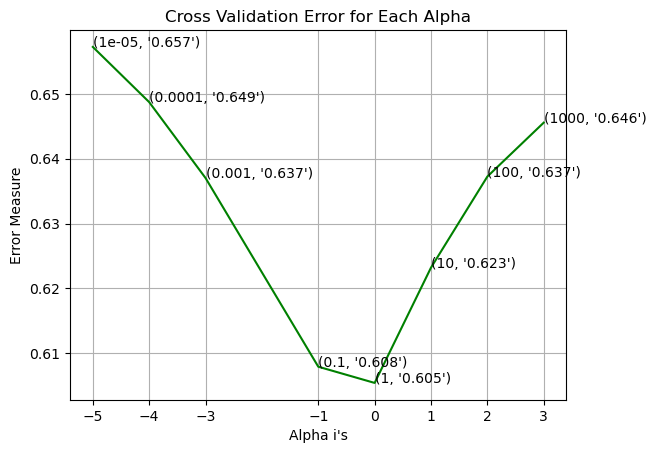

Train Log Loss: 0.49790011955410723
Test Log Loss: 0.6053944795593263


In [86]:
# Train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]

cv_log_error_array = []


for i in alpha:
    print("For Alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text_ohe, y_train)
    
    nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    nb_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = nb_sig_clf.predict_proba(test_text_ohe)
    
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # To avoid rounding error while multiplying probabilities, we use log-probability estimates
    print("Log Loss :", log_loss(y_test, sig_clf_probs)) 

# Plotting cross-validation error for each alpha
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
    
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

# Selecting best alpha
best_alpha = np.argmin(cv_log_error_array)

# Training the model with the best alpha
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
nb_sig_clf.fit(train_text_ohe, y_train)

# Predicting probabilities for training and testing data
predict_train_y = nb_sig_clf.predict_proba(train_text_ohe)
predict_test_y = nb_sig_clf.predict_proba(test_text_ohe)

# Compute log loss for training and testing data
train_log_loss = log_loss(y_train, predict_train_y, labels=clf.classes_, eps=1e-15)
test_log_loss = log_loss(y_test, predict_test_y, labels=clf.classes_, eps=1e-15)

# Print log loss values
print('Train Log Loss:', train_log_loss)
print('Test Log Loss:', test_log_loss)



In [87]:
nb_train_accuracy = (nb_sig_clf.score(train_text_ohe, y_train)*100)
nb_cv_accuracy = (nb_sig_clf.score(test_text_ohe, y_test)*100)

print("Naive Bayes Train Accuracy -",nb_train_accuracy)
print("Naive Bayes CV Accuracy -",nb_cv_accuracy)

Naive Bayes Train Accuracy - 84.54294901240239
Naive Bayes CV Accuracy - 81.14622388859132


C:\Users\pawvaibh\AppData\Local\Temp\ipykernel_10724\314897764.py:6: RuntimeWarning: invalid value encountered in divide
  B =(C/C.sum(axis=0)) # Precision matrix


---------------------------------------- Confusion Matrix ----------------------------------------


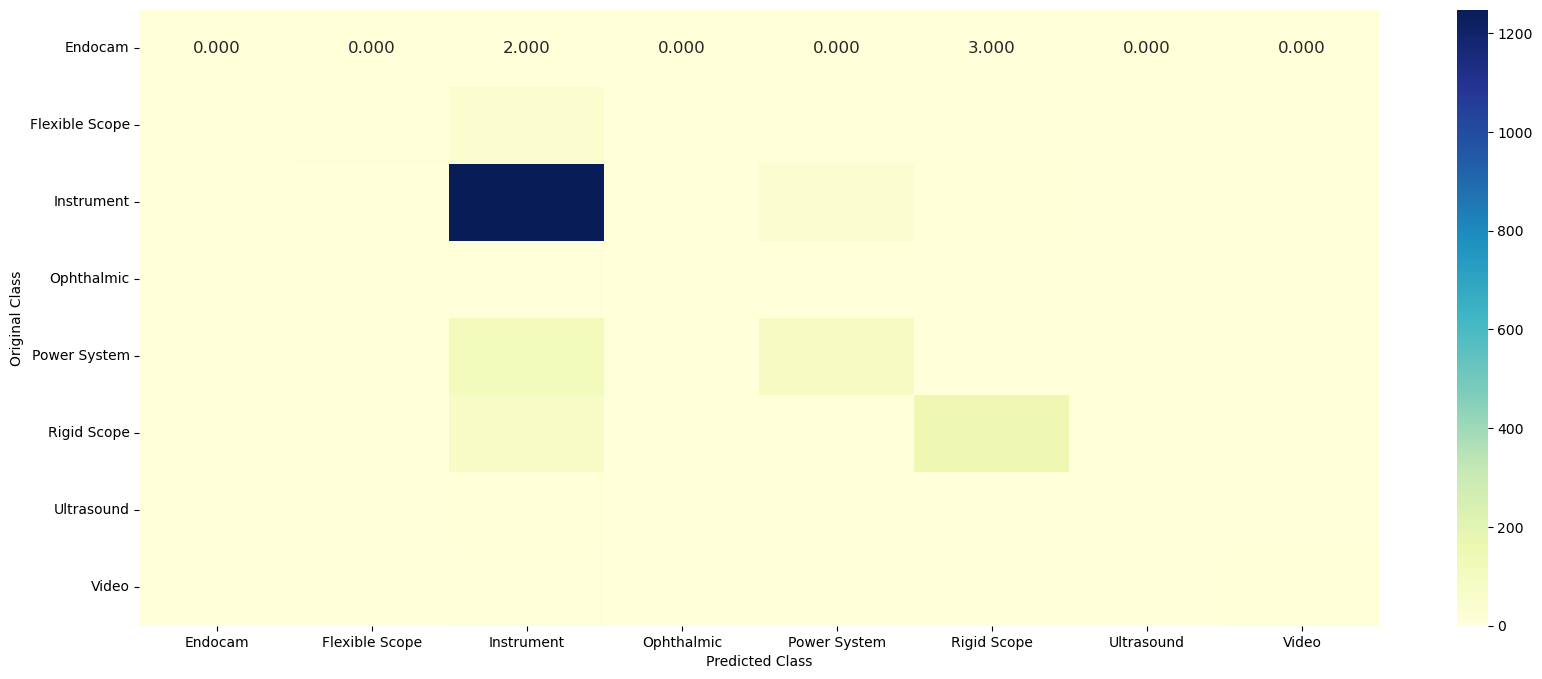

---------------------------------------- Precision Matrix (Column Sum=1) ----------------------------------------


C:\Users\pawvaibh\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


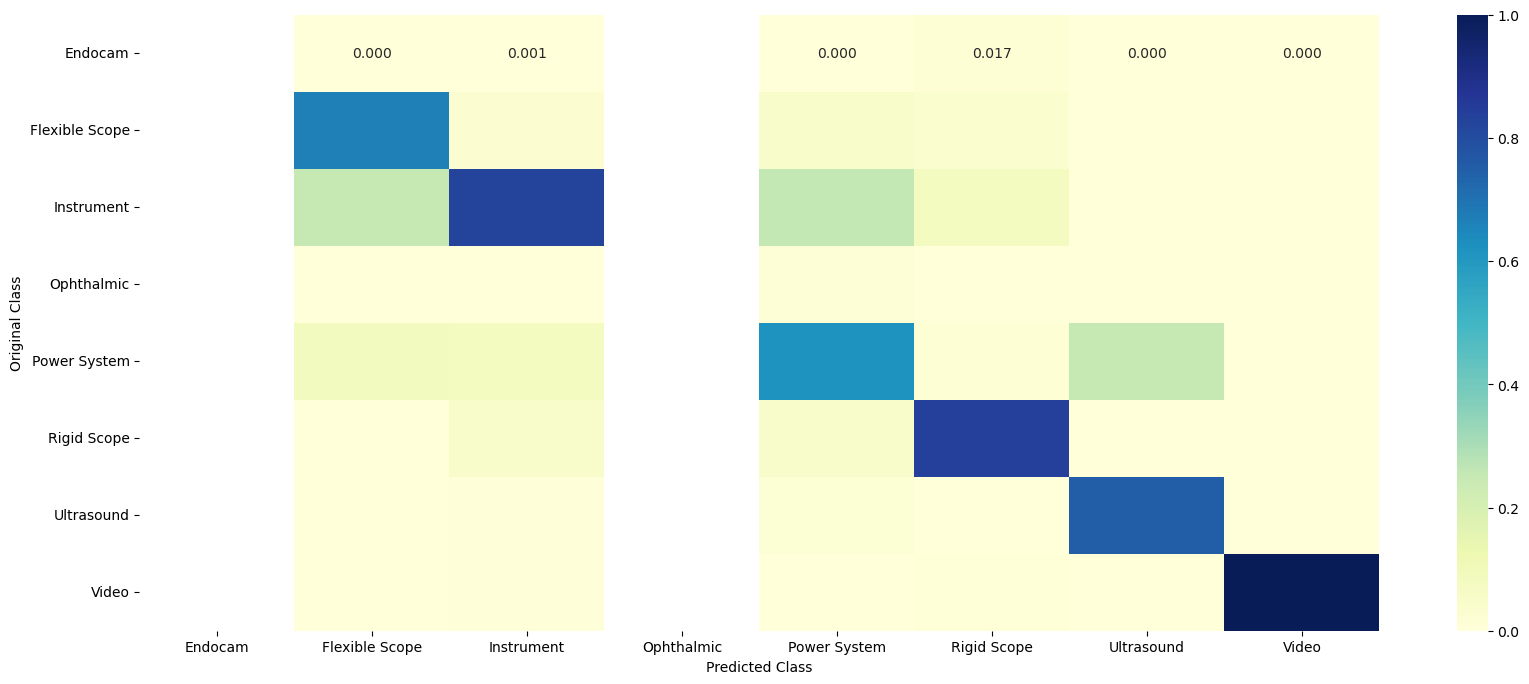

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


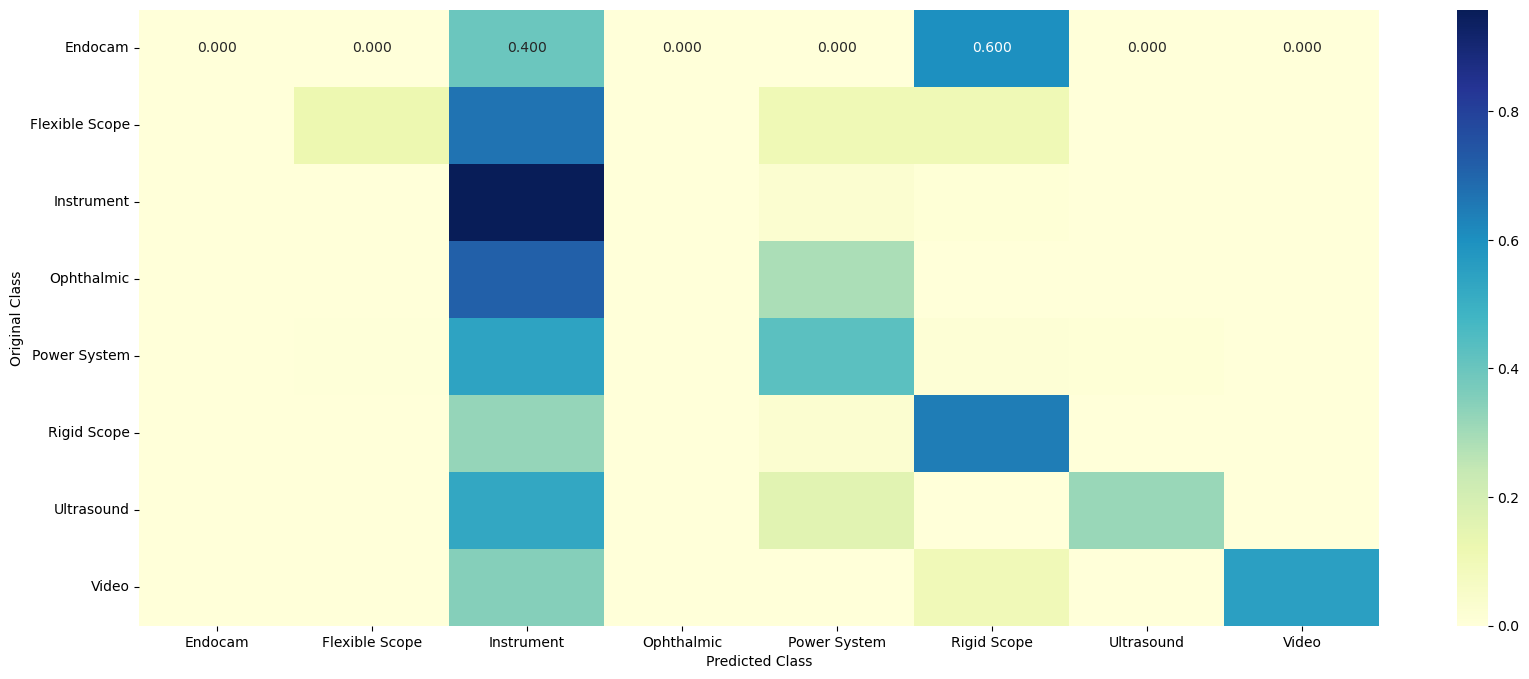

In [89]:
plot_confusion_matrix(y_test, nb_sig_clf.predict(test_text_ohe.toarray()))

In [99]:
df2=df1.copy()

In [100]:
df1.drop_duplicates(inplace=True)

In [103]:
df1.dropna(inplace=True)

In [104]:
df1.drop(columns=['CustomerName', 'ProductName', 'SterilizationMethodName', 'MachineTypeName', 'ItemTypeName','SpecialtyName'], inplace=True)

In [106]:
# Encode categorical variables
data_encoded = pd.get_dummies(df1, columns=['SterilizationMethodId', 'MachineTypeId', 'ItemTypeId', 'SpecialtyId'])

In [107]:
# Separate features and target variable
X = data_encoded.drop(columns=['CategoryName'])
y = data_encoded['CategoryName']

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

In [111]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7286501377410468


In [112]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Initialize Bagging Classifier with Decision Trees
bagging_classifier = BaggingClassifier()

# Train Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Evaluate Gradient Boosting Classifier
gb_accuracy = gb_classifier.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

# Evaluate Bagging Classifier
bagging_accuracy = bagging_classifier.score(X_test, y_test)
print("Bagging Classifier Accuracy:", bagging_accuracy)

Gradient Boosting Classifier Accuracy: 0.7796143250688705
Bagging Classifier Accuracy: 0.7444903581267218
